In [30]:
import h5py
import glob
import numpy as np
import pandas as pd
from util import plot
from util.atlas import Atlas
import matplotlib.pyplot as plt
from constants import SUBS

In [2]:
%cd ..

/scratch/gpfs/zzada/narrative-gradients


In [3]:
atlas = Atlas.schaefer(parcels=1000, networks=17, kong=True)

In [4]:
narratives = ['black', 'forgot']

modelname = 'whisper-medium_layer-18'
features = ['acoustic', 'encoder', 'decoder']

modelname

'whisper-medium_layer-18'

In [31]:
foldername = 'encoding'

files = glob.glob(f'results/{foldername}/sub-*/{modelname}/*h5')
print(len(files))

corrs = []
corrs_to = []
corrs_from = []

for filename in files:
    with h5py.File(filename, 'r') as f:
        # print(f['black_scores'].shape)
        # print(f['black_actual'].shape) # (534, 1000)
        # print(f['black_preds'].shape) # (3, 534, 1000)

        # corrs_to.append(f['black_scores'][-1, parcel_to])
        # corrs_from.append(f['black_scores'][-1, parcel_from])

        corrs.append(f['black_scores'][...])

46


In [43]:
roi_df = pd.read_csv('rois.csv', index_col=0)
roi_df.set_index('parcel', inplace=True)
roi2group = roi_df.to_dict(orient='index')

In [67]:
region2group = {
    'LH_EAC': 'LH_EAC',
    'LH_Lang_STG': 'LH_STG',
    'LH_Lang_STSda': 'LH_STG',
    'LH_Lang_STSva': 'LH_STG',
    'LH_Lang_STSdm': 'LH_STG',
    'LH_Lang_STSvm': 'LH_STG',
    'LH_Lang_STSp': 'LH_STG',
    'LH_Lang_SMG': 'LH_SMG',
    'LH_Lang_AngG': 'LH_TPJ',
    'LH_Lang_IPL': 'LH_TPJ',
    'LH_Lang_IFG': 'LH_IFG',
    'LH_Lang_IFG_Orb': 'LH_IFG',
    'LH_Lang_IFG_Oper': 'LH_IFG',
    'LH_Lang_IFS': 'LH_IFG',
    'LH_Lang_MFG': 'LH_MFG',
    'LH_Lang_SFL': 'LH_SFL',
    'LH_DMN_Cont_C': 'LH_Cont_C',
    'LH_DMN_PMC_A': 'LH_PMC_A',
    'LH_DMN_PMC_B': 'LH_PMC_B',
    'LH_DMN_PMC_C': 'LH_PMC_C',
    'LH_DMN_PHC': 'LH_PHC',
    'LH_DMN_dmPFC': 'LH_dmPFC',
    'LH_SM': 'LH_SM',
    'RH_EAC': 'RH_EAC',
    'RH_Lang_STG': 'RH_STG',
    'RH_Lang_STSda': 'RH_STG',
    'RH_Lang_STSva': 'RH_STG',
    'RH_Lang_STSdm': 'RH_STG',
    'RH_Lang_STSvm': 'RH_STG',
    'RH_Lang_STSp': 'RH_STG',
    'RH_Lang_SMG': 'RH_SMG',
    'RH_Lang_AngG': 'RH_TPJ',
    'RH_Lang_IPL': 'RH_TPJ',
    'RH_Lang_IFG': 'RH_IFG',
    'RH_Lang_IFG_Orb': 'RH_IFG',
    'RH_Lang_IFG_Oper': 'RH_IFG',
    'RH_Lang_IFS': 'RH_IFG',
    'RH_Lang_MFG': 'RH_MFG',
    'RH_Lang_SFL': 'RH_SFL',
    'RH_DMN_Cont_C': 'RH_Cont_C',
    'RH_DMN_PMC_A': 'RH_PMC_A',
    'RH_DMN_PMC_B': 'RH_PMC_B',
    'RH_DMN_PMC_C': 'RH_PMC_C',
    'RH_DMN_PHC': 'RH_PHC',
    'RH_DMN_dmPFC': 'RH_dmPFC',
    'RH_SM': 'RH_SM',
}

In [70]:
df = pd.DataFrame(np.stack(corrs).mean(0).T, columns=features)
df['parcel'] = atlas.labels
df['region'] = df['parcel'].apply(lambda x: roi2group.get(x, {}).get('ROI'))
df['group'] = df['region'].apply(lambda x: region2group.get(x))
df

,acoustic,encoder,decoder,parcel,region,group
0,0.009769,0.006253,0.011928,17networks_LH_DefaultA_FPole_1,None,None
1,0.005252,0.015992,0.022486,17networks_LH_DefaultA_FPole_2,None,None
2,0.015038,0.010977,0.019786,17networks_LH_DefaultA_FPole_3,LH_DMN_dmPFC,LH_dmPFC
3,0.002068,0.009793,0.050209,17networks_LH_DefaultA_IPL_1,LH_Lang_AngG,LH_TPJ
4,0.009173,0.005352,0.022640,17networks_LH_DefaultA_IPL_2,LH_Lang_AngG,LH_TPJ
...,...,...,...,...,...,...
995,-0.002155,0.006560,0.008561,17networks_RH_VisualC_ExStr_5,None,None
996,0.003217,0.000748,0.010999,17networks_RH_VisualC_ExStr_6,None,None
997,0.006855,0.008964,0.010770,17networks_RH_VisualC_ExStr_7,None,None
998,0.005894,0.008829,0.007242,17networks_RH_VisualC_ExStr_8,None,None


In [71]:
df_eac = df[df['region'] == 'LH_EAC']
df_eac.sort_values('decoder', ascending=False)

,acoustic,encoder,decoder,parcel,region,group
394,0.026704,0.083383,0.055141,17networks_LH_SomMotB_ParOper_3,LH_EAC,LH_EAC
348,0.088188,0.220306,0.048949,17networks_LH_Aud_ST_7,LH_EAC,LH_EAC
343,0.049358,0.106998,0.045492,17networks_LH_Aud_ST_2,LH_EAC,LH_EAC
349,0.090795,0.161081,0.039084,17networks_LH_Aud_ST_8,LH_EAC,LH_EAC
353,0.027582,0.063367,0.034618,17networks_LH_Aud_ST_12,LH_EAC,LH_EAC
344,0.042106,0.090046,0.031539,17networks_LH_Aud_ST_3,LH_EAC,LH_EAC
337,0.052403,0.142179,0.030570,17networks_LH_Aud_Ins_2,LH_EAC,LH_EAC
336,0.022944,0.059098,0.029905,17networks_LH_Aud_Ins_1,LH_EAC,LH_EAC
342,0.032626,0.072453,0.025873,17networks_LH_Aud_ST_1,LH_EAC,LH_EAC
352,0.024234,0.042741,0.022237,17networks_LH_Aud_ST_11,LH_EAC,LH_EAC


In [72]:
df_pmc = df[df['region'].apply(lambda x: x.startswith('LH_DMN_PMC_') if x is not None else False)]
df_pmc.sort_values('decoder', ascending=False)

,acoustic,encoder,decoder,parcel,region,group
93,0.004369,0.004476,0.056045,17networks_LH_DefaultC_RSC_3,LH_DMN_PMC_C,LH_PMC_C
9,0.000852,0.002762,0.037526,17networks_LH_DefaultA_PCC_1,LH_DMN_PMC_A,LH_PMC_A
105,0.007513,0.028258,0.032629,17networks_LH_DefaultC_pCun_6,LH_DMN_PMC_C,LH_PMC_C
31,0.007530,0.009349,0.032557,17networks_LH_DefaultA_pCun_3,LH_DMN_PMC_A,LH_PMC_A
94,0.003862,-0.001086,0.031369,17networks_LH_DefaultC_RSC_4,LH_DMN_PMC_C,LH_PMC_C
29,0.002176,-0.006505,0.028485,17networks_LH_DefaultA_pCun_1,LH_DMN_PMC_A,LH_PMC_A
107,0.005353,0.018329,0.028331,17networks_LH_DefaultC_pCun_8,LH_DMN_PMC_C,LH_PMC_C
34,0.005948,0.015194,0.024138,17networks_LH_DefaultA_pCun_6,LH_DMN_PMC_A,LH_PMC_A
49,0.003741,0.008211,0.023163,17networks_LH_DefaultB_PCC_4,LH_DMN_PMC_B,LH_PMC_B
100,0.008615,0.015313,0.022634,17networks_LH_DefaultC_pCun_1,LH_DMN_PMC_C,LH_PMC_C


# xcorr

In [106]:
parcel_pred = atlas['17networks_LH_SomMotB_ParOper_3']
parcel_actual = atlas['17networks_LH_DefaultC_RSC_3']

In [107]:
foldername = 'encoding'

files = glob.glob(f'results/{foldername}/sub-*/{modelname}/*h5')
print(len(files))

actuals = []
preds = []

for filename in files:
    with h5py.File(filename, 'r') as f:
        preds.append(f['black_preds'][-1, :, parcel_pred])
        actuals.append(f['black_actual'][:, parcel_actual])

46


In [108]:
preds = np.stack(preds)
actuals = np.stack(actuals)
actuals.shape

(46, 534)

In [109]:
xcorrs = []
for i in range(46):
    others = list(range(46))
    others.remove(i)

    sub_pred = preds[i]
    other_actual = actuals[others].mean(0)

    lags, corrs, _, _ = plt.xcorr(sub_pred, other_actual)
    xcorrs.append(corrs)

plt.close()

xcorrs = np.stack(xcorrs)
xcorrs.shape

(46, 21)

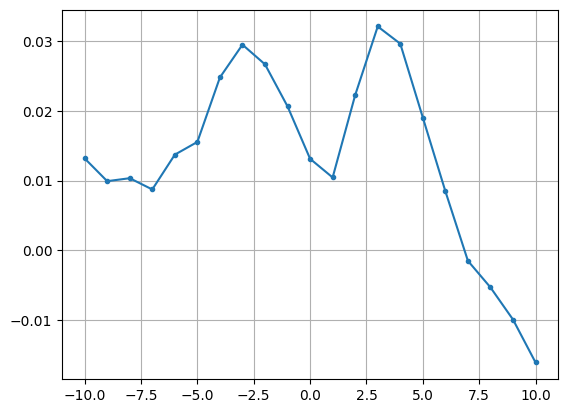

In [111]:
fig, ax = plt.subplots()
ax.plot(lags, xcorrs.mean(0), marker='.')
ax.grid()
fig.show()